Введение

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Нужно Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задачи

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Данные для первой части
Файл /datasets/hypothesis.csv. 
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:.2f}".format)
register_matplotlib_converters()
pd.options.display.max_colwidth = 130

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
print (data)

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
7              Добавить форму подписки на все основные страницы, чтобы собрать б

In [4]:
def overview_df(list):
    for i in range(len(list)):
        print(list[i].info())
        display(list[i].head())
        print('Количество явных дубликатов:', list[i].duplicated().sum())
        print('\nКоличество пропусков в столбцах:\n')
        print(list[i].isna().sum())
        print('\n\n')
    return

In [5]:
overview_df([data,orders,visitors])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Количество явных дубликатов: 0

Количество пропусков в столбцах:

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество явных дубликатов: 0

Количество пропусков в столбцах:

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество явных дубликатов: 0

Количество пропусков в столбцах:

date        0
group       0
visitors    0
dtype: int64





In [6]:
def rename(list):
    for i in range(len(list)):
        list[i].columns = [x.lower().replace(' ', '_') for x in list[i].columns]
    return

In [7]:
rename([data,orders,visitors])

In [8]:
orders = orders.rename(columns={'transactionid':'orderId', 'visitorid':'userId'})

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [10]:
# Количество групп в АБ тесте
orders['group'].unique()

array(['B', 'A'], dtype=object)

Их две - А и Б, логично

In [11]:
# А теперь количество в каждой группе
orders.groupby('group', as_index=False).agg({'userId': pd.Series.nunique})

,group,userId
0,A,503
1,B,586


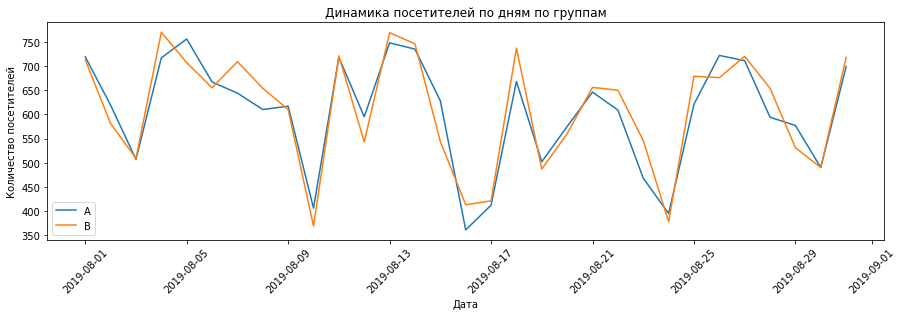

In [12]:
# Динамика посетителей по дням
plt.figure(figsize=(15, 4))
visitors_A = visitors[visitors['group']=='A']
visitors_B = visitors[visitors['group']=='B']
plt.plot(visitors_A['date'], visitors_A['visitors'], label='A')
plt.plot(visitors_B['date'], visitors_B['visitors'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Динамика посетителей по дням по группам")
plt.ylabel("Количество посетителей")
plt.xlabel("Дата")

plt.show()

Динамика практически идентичная, в диапазоне от 350 до 750

ЧАСТЬ 1

In [13]:
data['ICE'] = data['impact'] * data['confidence']/data['efforts']
data['ICE'] = data['ICE'].astype('float')
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применив фреймворк ICE мы получили 5 приоритетных гипотез:
1)  16.20 Запустить акцию, дающую скидку на товар в день рождения	
2)  13.33 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
3)  11.20 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
4)  8.00 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
5)  7.00 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

In [14]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']
data['RICE'] = data['RICE'].astype('float')
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Применив фреймворк RICE мы получили 5 приоритетных гипотез:
1)  112.00 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
2)  56.00 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа		
3)  40.00 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей		
4)  40.00 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
5)  16.20 Запустить акцию, дающую скидку на товар в день рождения	

В отличии от ICE, который использует лишь (Impact, Confidence и Efforts), фреймворк RICE использует в качестве параметра также и охват количества пользователей(Reach), которых затронет предполагаемое изменение.

Очевидно что "Запустить акцию, дающую скидку на товар в день рождения" - потенциально выгодное изменение, но коснется оно небольшого числа людей, поэтому RISE выдал ей лишь 5 место по приоритету

Теперь выявим гипотезы, вошедшие в оба списка по приоритету первых трех - 

1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

2) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

ЧАСТЬ 2

Данные для второй части
Файл /datasets/orders.csv.
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Я провел A/B-тест и получил результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

ЗАДАЧИ

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

In [15]:
display(orders.head())
display(visitors.head())

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Не забудем про предобработку

In [16]:
#Общее количество тестируемых
userId_unique_before = len(orders['userId'].unique())
userId_unique_before

1031

In [17]:
#Совпадения в группах А и Б
userId_A = orders['userId'].loc[orders['group']=='A'].unique()
userId_B = orders['userId'].loc[orders['group']=='B'].unique()
userId_A_B = np.intersect1d(userId_A,userId_B)
len(userId_A_B)

58

In [18]:
#Проверим на аномалии
orders['revenue'].describe()

count      1197.00
mean       8348.01
std       39191.13
min          50.00
25%        1220.00
50%        2978.00
75%        8290.00
max     1294500.00
Name: revenue, dtype: float64

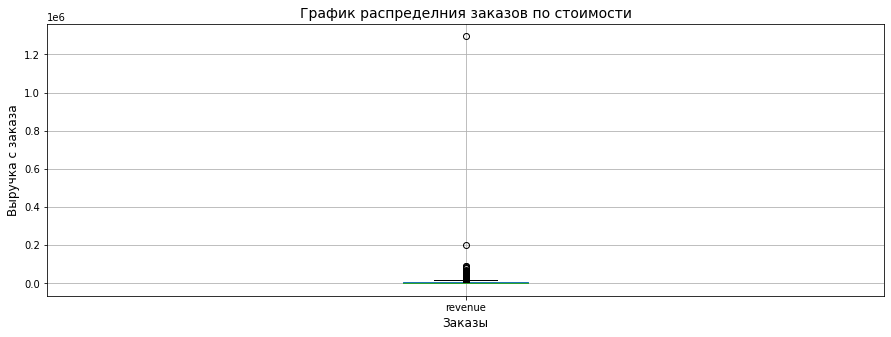

In [19]:
plt.figure(figsize=(15, 5))
orders.loc[:,['revenue']].boxplot()
plt.title('График распределния заказов по стоимости', fontsize=14)
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Выручка с заказа', fontsize=12)
plt.show()

Ящик с усами показывает,что есть заказы, далеко выходящие за рамки обычных.

In [20]:
orders.loc[orders['revenue']>200000]

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Нашлись эти аномалии

In [21]:
#Создадим для них отдельную группу 
userId_MaxRevenue = orders['userId'].loc[orders['revenue']>200000]

In [22]:
#Максимальное количество заказов от одного пользователя
orders.pivot_table(index='userId', values='orderId', aggfunc='count').max()

orderId    11
dtype: int64

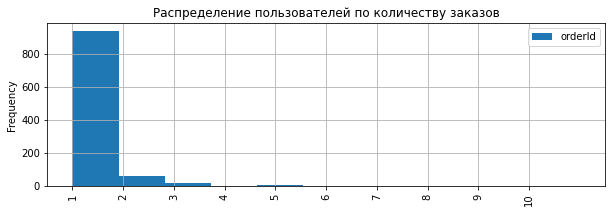

In [23]:
orders.pivot_table(index='userId', values='orderId', aggfunc='count').plot(kind='hist',
                           xticks=range(1, 11),
                           bins=11,
                           grid=True,
                           rot=90,
                           title='Распределение пользователей по количеству заказов',
                           legend=True,
                           figsize=(10, 3));
plt.show()

In [24]:
#Подавляющее большинство делает не больше двух заказов, при этом заказы в пределах 5 тоже можно считать нормой, остальных
#занесем в отдельный список
userId_MaxCountOrders = orders.pivot_table(index='userId', values='orderId', aggfunc='count').query('orderId>5').index

Исключаем пользователей попавших в групппы А и Б одновременно

In [25]:
#Заодно оценим процент потерь
orders_len_before = len(orders)
orders = orders.loc[((orders['userId'].isin(list(userId_A_B))!=True))]
orders_len_after = len(orders)
userId_unique_after = len(orders['userId'].unique())

In [26]:
round(100-100*orders_len_after/orders_len_before,1)

15.1

In [27]:
round(100-100*userId_unique_after/userId_unique_before,1)

5.6

Мы потеряли 15% записей о заказах и 5,6 процентов уникальных клиентов. Удаляли мы их чтобы провести чистый тест, четко сепарировав группы друг от друга

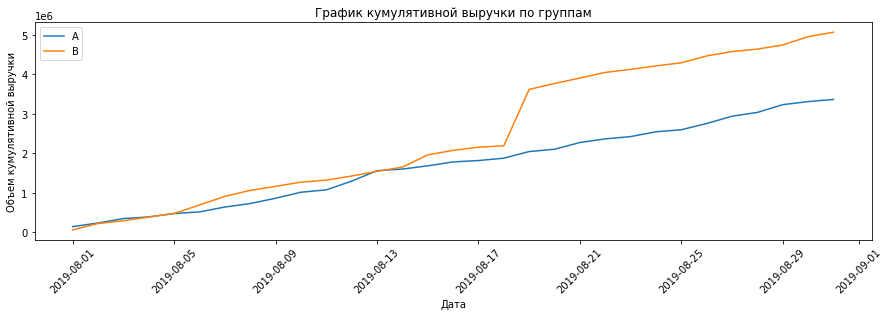

In [28]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивной выручки по группам")
plt.ylabel("Объем кумулятивной выручки")
plt.xlabel("Дата")
plt.show()

Выручка равномерно увеличивалась в течение всего периода, после 17 августа у группы  Б она внезпно резко выросла - возможно дело в размере чека - но может быть и в количестве чеков

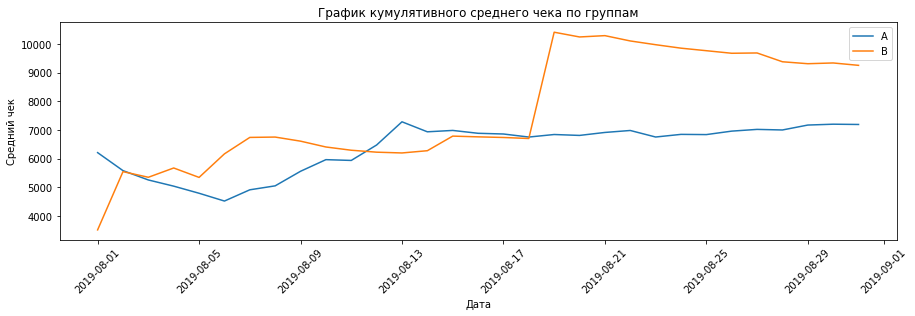

In [29]:
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.show()

В начале периода кумулятивный средний чек колебался, 17 августа чек у группы Б внезпано подскочил - но после начал свое планомерное снижение, возможно он стремится к показателям группы А - скорее всего это влияние выбросов, обнаруженных нами ранее

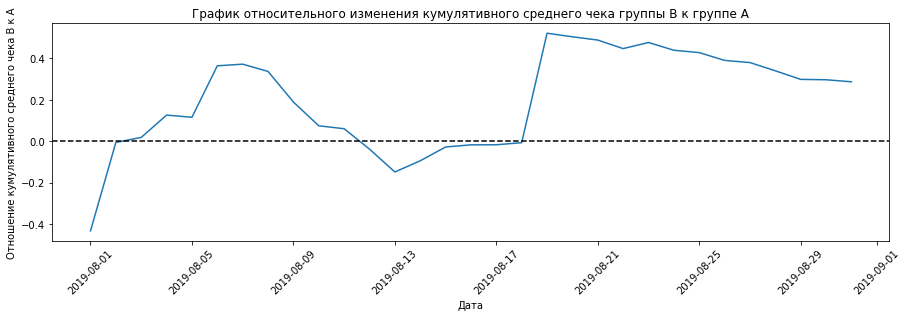

In [30]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel("Отношение кумулятивного среднего чека В к А")
plt.xlabel("Дата")
plt.show()

Средний чек группы Б существенно превышает средний чек Группы А. Почему? Хороший вопрос...

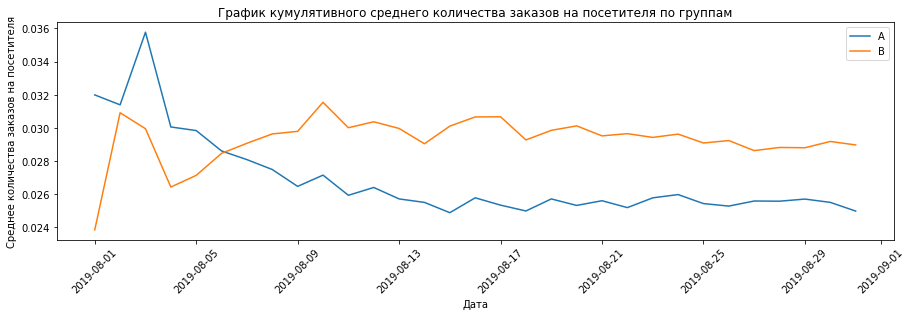

In [31]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количества заказов на посетителя")
plt.xlabel("Дата")
plt.show()

несмотря на то, что среднее количество заказов у группы А изначально было больше - в начале исследуемого периода группа Б показала хорошую динамику, которая потом стала стабильной и ровной - а вот группа А в начале периода показала падение ,но потом тоже выровнялась, хотя и на уровне заметно более никзом, нежели группа Б.

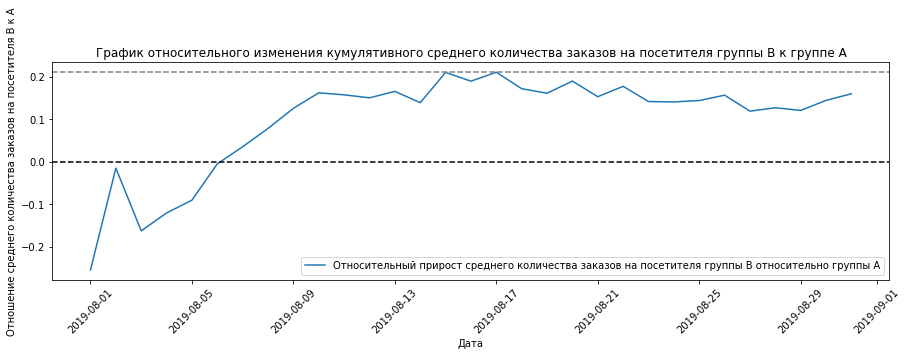

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel("Отношение среднего количества заказов на посетителя В к А")
plt.xlabel("Дата")
plt.show()

Среднее количество заказов у группы Б изначально было меньше, но после 5 августа Группа Б обогнала Группу А

In [33]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

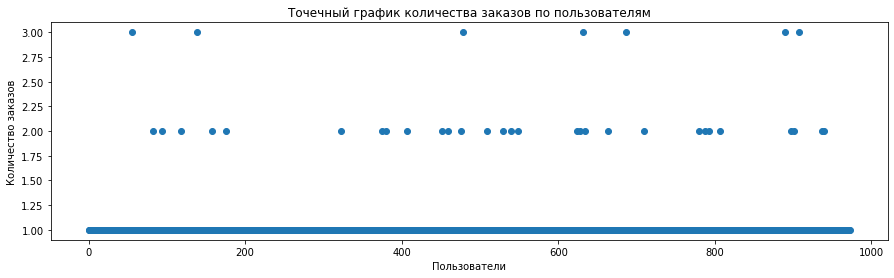

In [34]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

Чаще всего делался один заказ - реже два, а еще реже - три

In [35]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Пользователи, которые делали три заказа составляют менее 1% от общего числа. Граница 99 перцентиля составляет 2 заказа на пользователя. В качестве нижней границы аномалий я бы выбрал 3 заказа

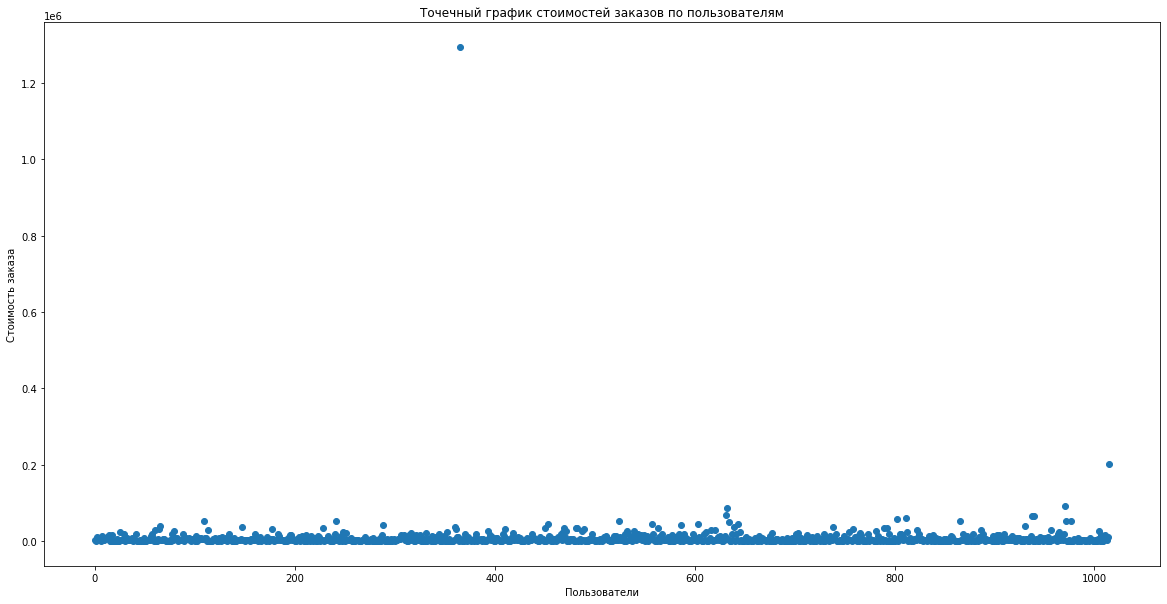

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(20, 10))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.show()

На графике видны аномалии, при этом я предлагаю брать за аномалии заказы со стоимостью от 53 000

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

99% всех заказов укладываются в стоимость 53 904. Заказы выше этой суммы составляют менее 1 % от общего числа заказов.

Подготовим данные и сформулируем гипотезы - нулевая (различий в среднем количестве заказов между группами нет.) и Альтернативная - (различия в среднем между группами есть.)

Выбранный мною уровень статистической значимости составляет 5%, а проводимый тест - тест Манна-Уитни

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [39]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.01102


Нулевая гипотеза отвергается в пользу альтернативной, так как 0.01<0.05

In [40]:
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.160


Количество заказов на пользователя в группе Б на 16% превышает аналогичный показатель группы А

Нулевая гипотеза - статистически значимых различий в среднем чеке заказа между группами  нет
Альтернативная - различия между группами есть.

In [41]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.829


0.829 > 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

In [42]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


разница в среднем чеке между группами составляют 28.7%

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0]) 

16


16 пользователей удалены из дальнейшего анализа

In [44]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.007


0.007 < 0.05. Наш предыдущий вывод остается без изменений: нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем в пользу альтернативной гипотезы - среднее число заказов на пользователя между группами различается.

In [46]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.189


После чистки количество заказов на пользователя в группе Б на 18.9% превышает аналогичный показатель группы А

In [47]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

0.788


0.788 > 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

In [48]:
print(
    '{0:.3f}'.format(
        
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean() /
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean()-1
    )
)

0.033


После чистки различия в среднем чеке между группами не превышают 3.3 процентов

Сравнение двух групп показало, что в группе Б количество заказов в расчете на одного пользователя первышает аналогичный показатель группы А. В то же время, средний чек по группам одинаков. Таким образом, можно зафиксировать победу группы Б - следовательно, необходимость в продолжении теста отсутствует.

Общий вывод:
    Поставленные задачи:
        приоритизировать гипотезы,
        запустить A/B-тест,
        проанализировать результаты.


Была выполнена предобработка данных
В ходе приоритезирования гипотез по фреймворкам ICE и RICE удалось определить наиболее важные из них, сочетая оба вида приоритезирования:

1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

2) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Выводы по А\Б тестам:

Кумулятивная вырчка по группам у Групыы Б к концу периода заметно выше, чем у группы А

Кумулятивный средний чек выше у группы Б чем у группы А к концу периода

кумулятивное среднее количество заказов выше у группы Б, чем  у группы А к концу периода

Менее 1% покупателей совершают 3 покупки, они отнесчены к аномалиям

Менее 1% покупателей делают заказ на сумму выше  53 904, для красоты мы округлили вниз - и суммы выше отнесли к аномалиям

Количество заказов на пользователя в группе Б на 16% превышает аналогичный показатель группы А

После чистки количество заказов на пользователя в группе Б на 18.9% превышает аналогичный показатель группы А

После чистки различия в среднем чеке между группами не превышают 3.3 процентов


Сравнение двух групп показало, что в группе Б количество заказов в расчете на одного пользователя первышает аналогичный показатель группы А. В то же время, средний чек по группам одинаков. Таким образом, можно зафиксировать победу группы Б - следовательно, необходимость в продолжении теста отсутствует.